In [8]:
# loaded the pre-trained embeddings in Google Colab which enables to use free use of GPU.

from google.colab import drive
drive.mount('/content/gdrive')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.cm as cm


In [9]:
%cd gdrive/My Drive/Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [3]:
# install BERT pre-trained embeddings
! git clone https://github.com/negedng/bert-embedding#egg=bert_embedding

Obtaining bert_embedding from git+https://github.com/negedng/bert-embedding#egg=bert_embedding
  Updating ./src/bert-embedding clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 32fb23a1398f824aea7c7c9e6ec89843dc7d0c91
     |████████████████████████████████| 68.7MB 55kB/s 
     |████████████████████████████████| 256kB 43.6MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.9.1-cp36-cp36m-linux_x86_64.whl size=470041 sha256=9d5ad5facc245b22d0ed959b1025b0d6f57eb567ef24603c84d1def134e495d2
  Stored in directory: /root/.cache/pip/wheels/af/60/16/1f8a40e68b85bd9bd7960e91830bca5e40cd113f3220b7e231
Successfully built gluonnlp
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Running setup.py develop for bert-embedding


In [3]:
from gensim.models import KeyedVectors
WORD2WEC_EMBEDDING_FILE = '../data/GoogleNews-vectors-negative300.bin.gz' # from above
word2vec = KeyedVectors.load_word2vec_format(WORD2WEC_EMBEDDING_FILE, binary=True)

In [1]:
from bert_embedding import BertEmbedding
bert_embedding = BertEmbedding()

Vocab file is not found. Downloading.


# Word2Vec

In [4]:
# first visualization, top 10 mmost similar words of 6 key words below
keys = ['invoice', 'reminder', 'other', 'payment', 'email', 'company']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in word2vec.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(word2vec[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [5]:
# create clusters
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

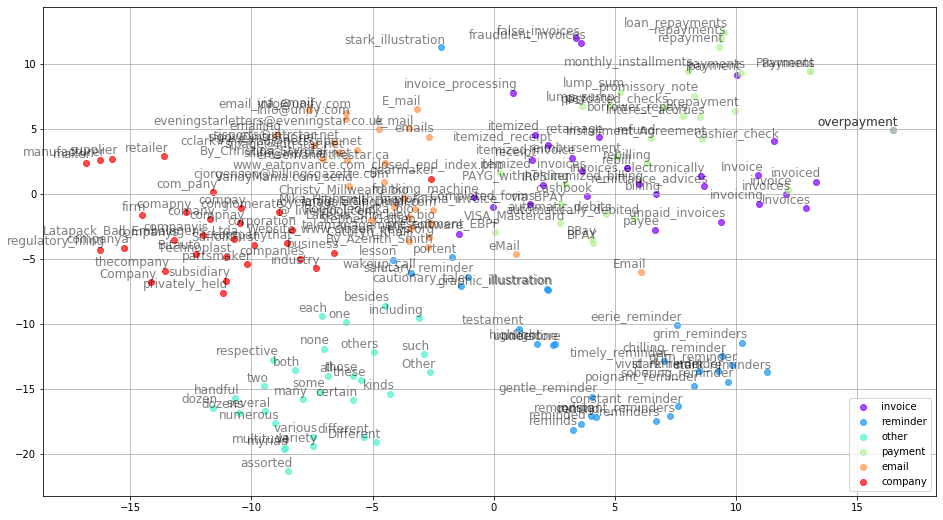

In [9]:
# plot clusters

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=12)
    plt.legend(loc=4)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [10]:
# second visualization words below 
Wl = ['man', 'woman', 'rich', 'poor', 'queen', 'king', 'fisherman', 'teacher', 'actress', 'actor']
Wv = []
for i in range(len(Wl)):
    Wv.append(word2vec[Wl[i]])

In [11]:
b1 = (Wv[1]-Wv[0])
b2 = (Wv[3]-Wv[2])

In [12]:
W = np.array(Wv)
B = np.array([b1,b2])
Bi = np.linalg.pinv(B.T)

In [13]:
print(B.shape)
print(W.T.shape)

(2, 300)
(300, 10)


In [14]:
Wp = np.matmul(Bi,W.T)
print(Wp.shape)
Wp = (Wp.T-[Wp[0,2],Wp[1,0]]).T

(2, 10)


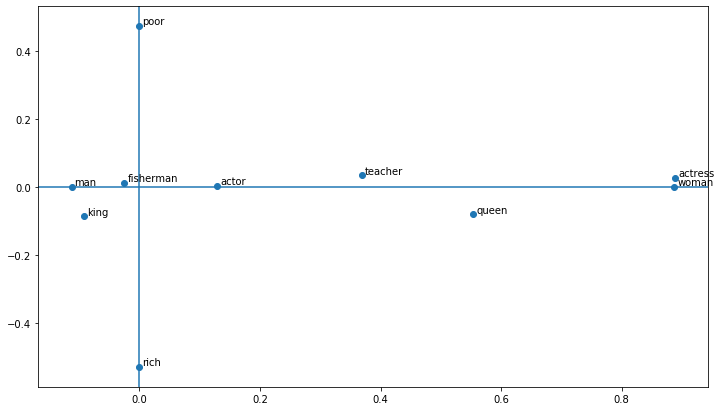

In [15]:
plt.figure(figsize=(12,7))
plt.axvline()
plt.axhline()
plt.scatter(Wp[0,:], Wp[1,:])
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
eps = 0.005
for i, txt in enumerate(Wl):
    plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
plt.show()

In [16]:
# third visualization Word2Vec
Wl = ['other', 'invoice', 'reminder', 'new', 'queen', 'king', 'payment', 'teacher', 'actress', 'actor']
Wv = []
for i in range(len(Wl)):
    Wv.append(word2vec[Wl[i]])

In [17]:
b1 = (Wv[1]-Wv[0])
b2 = (Wv[3]-Wv[2])

In [18]:
W = np.array(Wv)
B = np.array([b1,b2])
Bi = np.linalg.pinv(B.T)

In [19]:
print(B.shape)
print(W.T.shape)

(2, 300)
(300, 10)


In [20]:
Wp = np.matmul(Bi,W.T)
print(Wp.shape)
Wp = (Wp.T-[Wp[0,2],Wp[1,0]]).T

(2, 10)


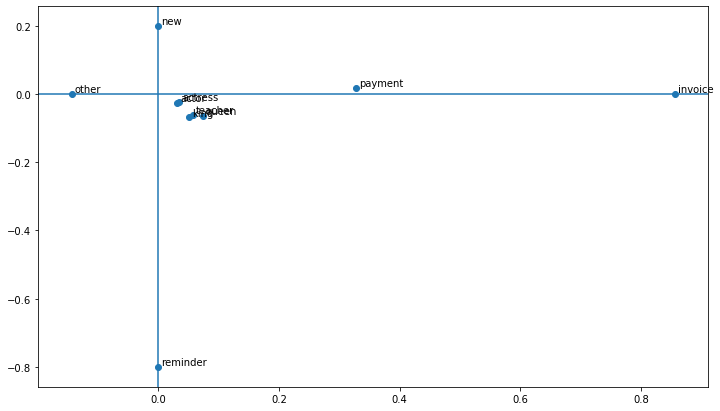

In [21]:
plt.figure(figsize=(12,7))
plt.axvline()
plt.axhline()
plt.scatter(Wp[0,:], Wp[1,:])
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
eps = 0.005
for i, txt in enumerate(Wl):
    plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
plt.show()

# BERT


In [0]:
# visualize embeddings BERT
embs = bert_embedding([s1], filter_spec_tokens=False)

In [0]:
labels = embs[0][0]
embV = embs[0][1]

In [0]:
W = np.array(embV)
B = np.array([embV[0], embV[-1]])
Bi = np.linalg.pinv(B.T)

In [0]:
Wp = np.matmul(Bi,W.T)
print(Wp.shape)

(2, 8)


In [0]:
def get_visual_embs(sentence):
    """Get BERT embedding for the sentence,
    project it to a 2D subspace where [CLS] is (1,0) and [SEP] is (0,1)."""
    embs = bert_embedding([sentence], filter_spec_tokens=False)
    tokens = embs[0][0]
    embV = embs[0][1]
    W = np.array(embV)

    B = np.array([embV[0], embV[-1]])
    Bi = np.linalg.pinv(B.T)
    Wp = np.matmul(Bi,W.T)

    return Wp, tokens

['[CLS]', 'this', 'is', 'an', 'invoice', 'to', 'pay', '[SEP]']
['[CLS]', 'can', 'you', 'please', 'pay', 'this', 'invoice', '[SEP]']
['[CLS]', 'this', 'is', 'a', 'reminder', 'of', 'an', 'invoice', 'to', 'pay', '[SEP]']
['[CLS]', 'this', 'invoice', 'is', 'not', 'payed', 'yet', '[SEP]']
['[CLS]', 'this', 'virus', 'affects', 'us', 'all', '[SEP]']
['[CLS]', 'our', 'country', 'is', 'in', 'lockdown', '[SEP]']
['[CLS]', 'pandemic', 'leads', 'to', 'financial', 'crisis', '[SEP]']


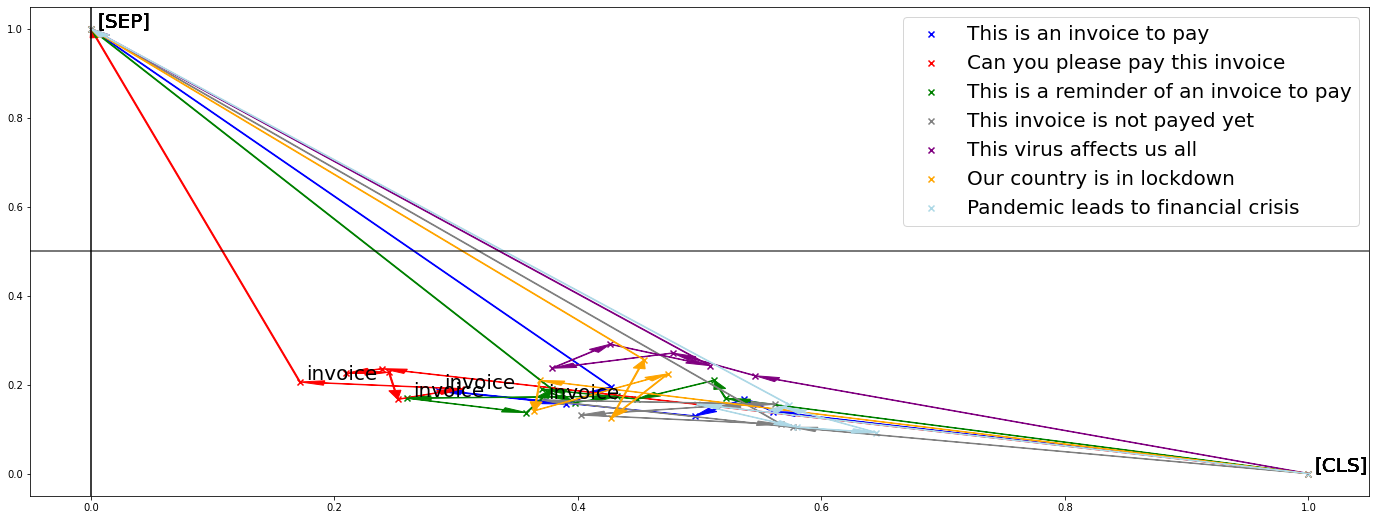

In [0]:

sentences = ["This is an invoice to pay",
             "Can you please pay this invoice",
             "This is a reminder of an invoice to pay",
             "This invoice is not payed yet",
             "This virus affects us all",
             "Our country is in lockdown",
             "Pandemic leads to financial crisis"
             ]

colors = ['blue', 'red', 'green', 'grey', 'purple', 'orange', 'lightblue', 'yellow']

plt.figure(figsize=(24,9))
plt.axhline(0.5, alpha=1.7, color='black')
plt.axvline(color='black')
for n,s in enumerate(sentences):
    Wp, tokens = get_visual_embs(s)
    print(tokens)
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=s)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, txt in enumerate(tokens):
        if txt in ['[CLS]', '[SEP]']:
            plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps), size=20)
        if txt=='invoice':
            plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps), size=20)
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend(prop={"size":20})

plt.savefig('BERT2.png')
plt.show()